# Load the dataset

In [311]:
import pandas as pd
# Remove the limit on the number of columns displayed
pd.set_option('display.max_columns', None)

In [312]:
fact_table = pd.read_csv("fact_table.csv")

In [313]:
fact_table.head(1)

,Unnamed: 0.2,Match ID,Team 1,Team 2,Team 1 Score,Team 2 Score,Winner,Prev Team 1 Played,Prev Team 1 Won,Prev Team 1 Drawn,Prev Team 1 Lost,Prev Team 1 Goals Scored,Prev Team 1 Goals Conceded,Prev Team 1 Goal Difference,Prev Team 1 Points,Prev Team 1 Form,Prev Team 2 Played,Prev Team 2 Won,Prev Team 2 Drawn,Prev Team 2 Lost,Prev Team 2 Goals Scored,Prev Team 2 Goals Conceded,Prev Team 2 Goal Difference,Prev Team 2 Points,Prev Team 2 Form,Date,Time,Wk,Day,xG,xG.1,Attendance,Venue,Referee,StadiumID,Latitude,Longitude,Datetime,Temperature,H2H_Team_1_Wins_Last_4,H2H_Team_2_Wins_Last_4,H2H_Draws_Last_4,Composite Key,team_2_code,team_1_code,team_1_xg,team_2_xg,is_result,has_data,url,team2_points,team2_expected_points,team2_np_xg,team2_np_xg_difference,team2_ppda,team2_deep_completions,team1_points,team1_expected_points,team1_np_xg,team1_np_xg_difference,team1_ppda,team1_deep_completions,gameweek,team_1_fdr,team_2_fdr,composite_key,B365H,B365D,B365A,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Cumulative_Avg_HST,Cumulative_Avg_AST,Cumulative_Avg_HF,Cumulative_Avg_AF,Cumulative_Avg_HC,Cumulative_Avg_AC,Cumulative_Avg_HY,Cumulative_Avg_AY,Cumulative_Avg_HR,Cumulative_Avg_AR,Unnamed: 0.1,Score,Away Win Odds,Home Win Odds,Draw Odds,Precipitation,Unnamed: 0,Cum Team 1 FDR,Cum Team 2 FDR,Avg Team 1 FDR,Avg Team 2 FDR,Cum PPDA Team 1,Cum PPDA Team 2,Avg PPDA Team 1,Avg PPDA Team 2,Cum Deep Completions Team 1,Cum Deep Completions Team 2,Avg Deep Completions Team 1,Avg Deep Completions Team 2,Weighted Avg PPDA Team 1,Weighted Avg PPDA Team 2,Weighted Avg Deep Completions Team 1,Weighted Avg Deep Completions Team 2,Cum xG,Avg xG,Weighted Avg xG,Cum xG.1,Avg xG.1,Weighted Avg xG.1,Cum xG Team 1,Cum xG Team 2,Avg xG Team 1,Avg xG Team 2,Weighted Avg xG Team 1,Weighted Avg xG Team 2,Cum np_xg,Avg team1_np_xg,Avg team2_np_xg,Weighted Avg team1_np_xg,Weighted Avg team2_np_xg,Cum expected_points,Avg team1_expected_points,Avg team2_expected_points,Weighted Avg team1_expected_points,Weighted Avg team2_expected_points,Cum Team 1 Won,Cum Team 2 Won,Avg Team 1 Won,Avg Team 2 Won,Cum Team 1 Drawn,Cum Team 2 Drawn,Avg Team 1 Drawn,Avg Team 2 Drawn,Cum Team 1 Lost,Cum Team 2 Lost,Avg Team 1 Lost,Avg Team 2 Lost,Cum Team 1 Goals Scored,Cum Team 2 Goals Scored,Avg Team 1 Goals Scored,Avg Team 2 Goals Scored,Cum Team 1 Goals Conceded,Cum Team 2 Goals Conceded,Avg Team 1 Goals Conceded,Avg Team 2 Goals Conceded,Cum Team 1 Goal Difference,Cum Team 2 Goal Difference,Avg Team 1 Goal Difference,Avg Team 2 Goal Difference,Cum Team 1 Points,Cum Team 2 Points,Avg Team 1 Points,Avg Team 2 Points,Sunset_Time,Match_Time_Category,ppg_team1,ppg_team2
0,0,497410,Manchester Utd,Fulham,1.0,0.0,HOME_TEAM,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,2024-08-16,19:00:00,1,Fri,2.4,0.4,73297.0,Old Trafford,Robert Jones,1.0,53.4631,-2.2914,2024-08-16T19:00:00,14.313,3,1,0,2024-08-16_Manchester Utd_Fulham,FLH,MUN,2.04268,0.418711,True,True,https://understat.com/match/26602,0.0,0.2815,0.418711,-1.623969,10.833333,3.0,3.0,2.5696,2.04268,1.623969,7.37931,7.0,1.0,2,3,2024-08-16_Manchester Utd_Fulham,1.6,4.2,5.25,5.0,2.0,12.0,10.0,7.0,8.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.461391,0.0,0.0,0.0,0.0,2.8511,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,21:30:00,Daytime,0.0,0.0


In [314]:
# Re-import necessary libraries due to reset
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding
fact_table['time_period_encoded'] = label_encoder.fit_transform(fact_table['Match_Time_Category'])

# Display the results
fact_table, dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))


(     Unnamed: 0.2  Match ID           Team 1          Team 2  Team 1 Score  \
 0               0    497410   Manchester Utd          Fulham           1.0   
 1               1    497411     Ipswich Town       Liverpool           0.0   
 2               2    497412          Arsenal          Wolves           2.0   
 3               3    497413          Everton        Brighton           0.0   
 4               4    497414    Newcastle Utd     Southampton           1.0   
 ..            ...       ...              ...             ...           ...   
 154           154    497562         Brighton  Crystal Palace           NaN   
 155           155    497565  Manchester City  Manchester Utd           NaN   
 156           156    497563          Chelsea       Brentford           NaN   
 157           157    497568      Southampton       Tottenham           NaN   
 158           158    497560      Bournemouth        West Ham           NaN   
 
      Team 2 Score     Winner  Prev Team 1 Played 

In [315]:
dataset = fact_table[['Team 1 Score', 'Team 2 Score','Prev Team 1 Form','Prev Team 2 Form','Attendance','team1_points','Prev Team 2 Goal Difference',
'Prev Team 2 Points','Prev Team 2 Form', 'Temperature', 'H2H_Team_1_Wins_Last_4', 'H2H_Team_2_Wins_Last_4', 
'H2H_Draws_Last_4','Cumulative_Avg_HST','Cumulative_Avg_AST','Cumulative_Avg_HF',	'Cumulative_Avg_AF',	
'Cumulative_Avg_HC', 'Cumulative_Avg_AC', 'Cumulative_Avg_HY', 'team_1_fdr','team_2_fdr', 'Cumulative_Avg_AY',	
'Cumulative_Avg_HR', 'Cumulative_Avg_AR','team2_expected_points', 'B365H', 'B365D', 'B365A', 
 'Cum PPDA Team 2', 'Avg PPDA Team 1', 'Avg PPDA Team 2', 
'Avg Deep Completions Team 1', 'Avg Deep Completions Team 2', 'Weighted Avg PPDA Team 1', 
'Weighted Avg PPDA Team 2', 'Weighted Avg Deep Completions Team 1', 'Weighted Avg Deep Completions Team 2', 
'Avg xG', 'Weighted Avg xG', 'Avg xG.1', 'Weighted Avg xG.1', 'Avg xG Team 1', 'Avg xG Team 2',
'Weighted Avg xG Team 1', 'Weighted Avg xG Team 2', 'Cum np_xg', 'Avg team1_np_xg', 'Avg team2_np_xg', 
'Weighted Avg team1_np_xg', 'Weighted Avg team2_np_xg',  'Avg team1_expected_points', 
'Avg team2_expected_points', 'Weighted Avg team1_expected_points', 'Weighted Avg team2_expected_points',
'Avg Team 1 Won', 'Avg Team 2 Won', 'Avg Team 1 Drawn', 'Avg Team 2 Drawn', 'Avg Team 1 Lost', 'Avg Team 2 Lost',
'Avg Team 1 Goals Scored', 'Avg Team 2 Goals Scored', 'Avg Team 1 Goals Conceded', 'Avg Team 2 Goals Conceded', 
'Avg Team 1 Goal Difference','Avg Team 2 Goal Difference', 'time_period_encoded', 'ppg_team1', 'ppg_team2']]

In [316]:
dataset = dataset.iloc[10:-10]
df = dataset

In [317]:
df['time_period_encoded']

10     0
11     0
12     0
13     0
14     0
      ..
144    0
145    0
146    0
147    1
148    1
Name: time_period_encoded, Length: 139, dtype: int64

In [318]:
df.columns

Index(['Team 1 Score', 'Team 2 Score', 'Prev Team 1 Form', 'Prev Team 2 Form',
       'Attendance', 'team1_points', 'Prev Team 2 Goal Difference',
       'Prev Team 2 Points', 'Prev Team 2 Form', 'Temperature',
       'H2H_Team_1_Wins_Last_4', 'H2H_Team_2_Wins_Last_4', 'H2H_Draws_Last_4',
       'Cumulative_Avg_HST', 'Cumulative_Avg_AST', 'Cumulative_Avg_HF',
       'Cumulative_Avg_AF', 'Cumulative_Avg_HC', 'Cumulative_Avg_AC',
       'Cumulative_Avg_HY', 'team_1_fdr', 'team_2_fdr', 'Cumulative_Avg_AY',
       'Cumulative_Avg_HR', 'Cumulative_Avg_AR', 'team2_expected_points',
       'B365H', 'B365D', 'B365A', 'Cum PPDA Team 2', 'Avg PPDA Team 1',
       'Avg PPDA Team 2', 'Avg Deep Completions Team 1',
       'Avg Deep Completions Team 2', 'Weighted Avg PPDA Team 1',
       'Weighted Avg PPDA Team 2', 'Weighted Avg Deep Completions Team 1',
       'Weighted Avg Deep Completions Team 2', 'Avg xG', 'Weighted Avg xG',
       'Avg xG.1', 'Weighted Avg xG.1', 'Avg xG Team 1', 'Avg xG Team 2

In [319]:
df.to_csv("modelling_table.csv")

In [320]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline



# # Clean the data if necessary
# data = data.iloc[10:]  # Remove initial rows if they're not needed

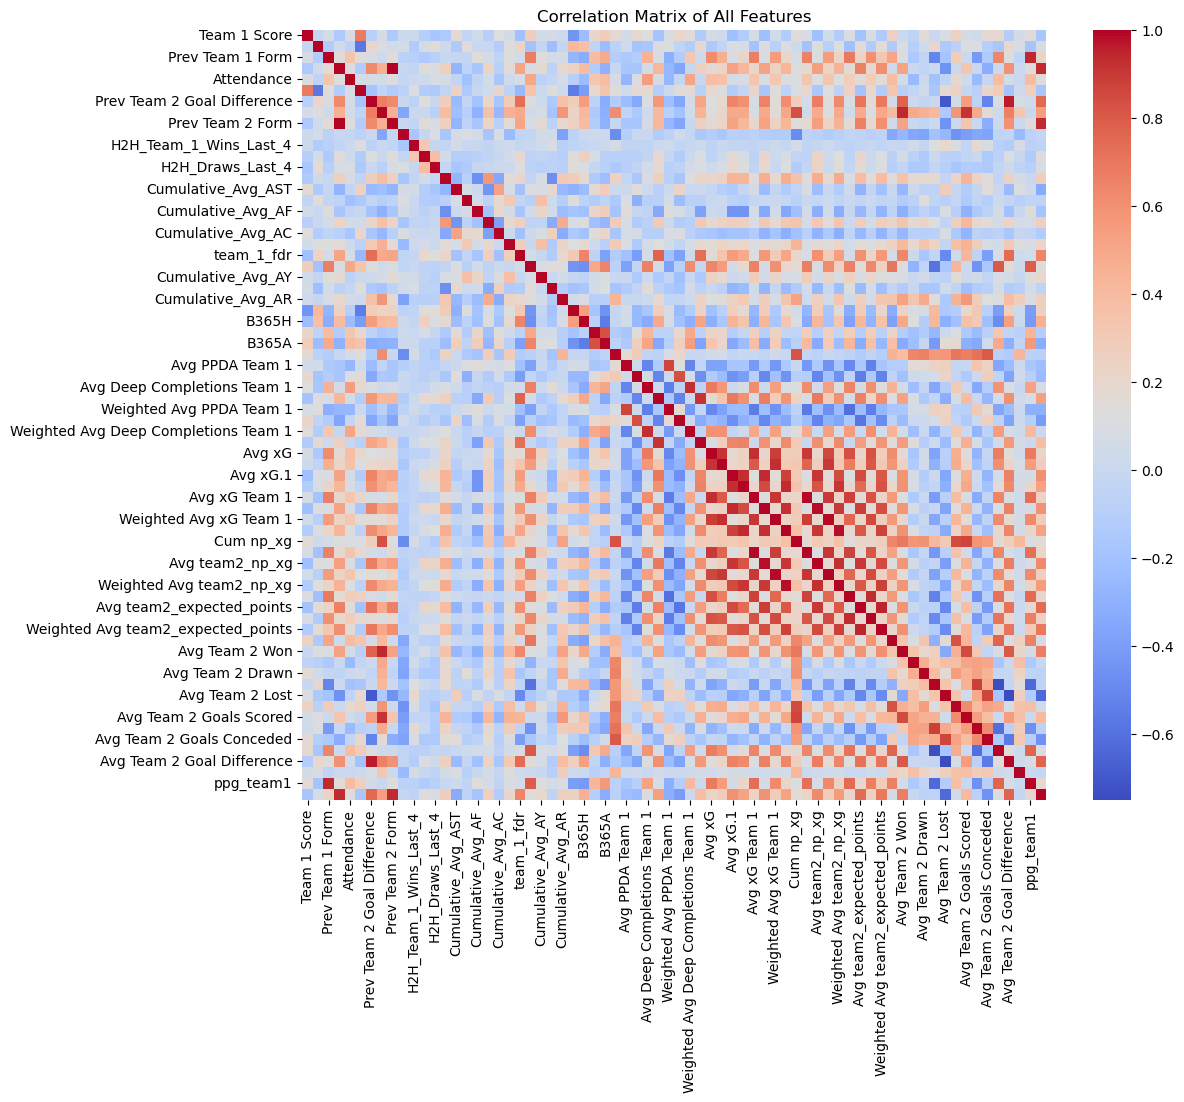

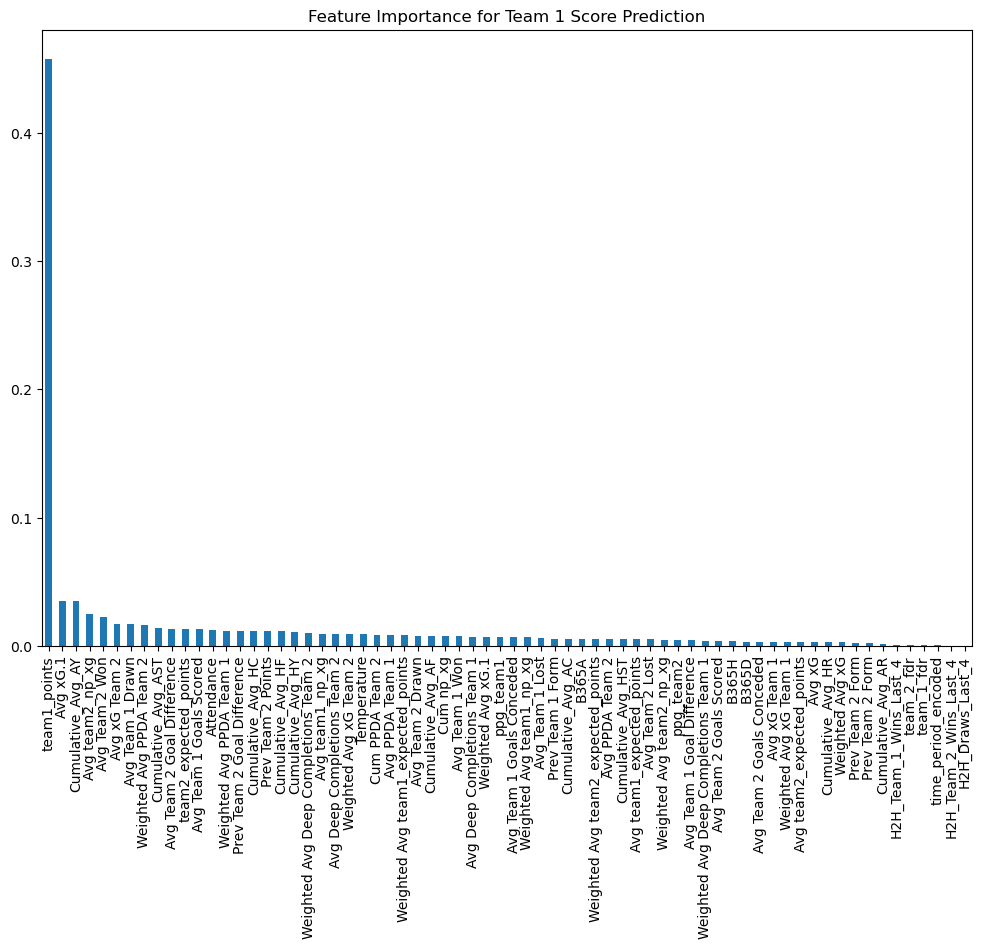

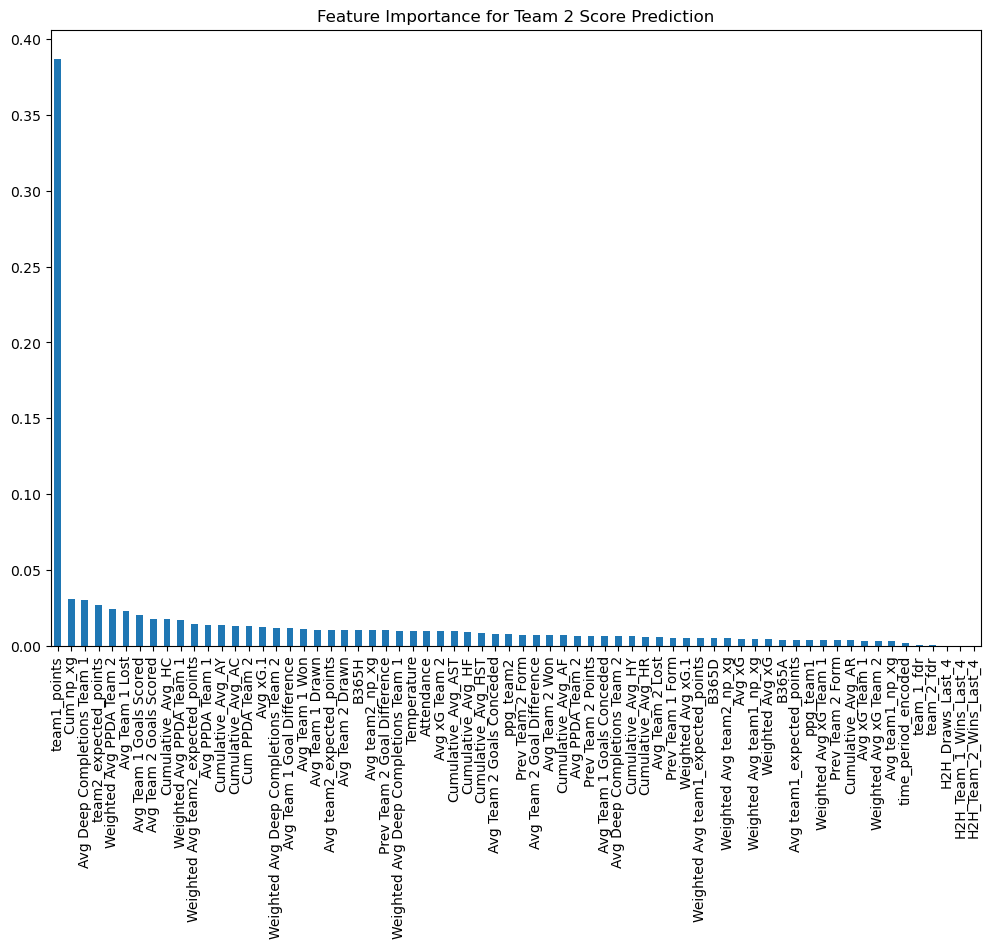

,Team 1 Score,Team 2 Score
Team 1 Score,1.000000,-0.018172
team1_points,0.679293,-0.567407
B365A,0.283619,-0.232307
team_2_fdr,0.270306,-0.199800
Avg Team 1 Won,0.254307,-0.140029
...,...,...
Avg team2_np_xg,-0.212986,0.131830
Avg xG.1,-0.215049,0.101889
Avg xG Team 2,-0.217523,0.128109
B365H,-0.232060,0.372733


In [321]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

#Dropping the first column which is likely just an index or ID
data_cleaned = df

# Calculate correlation matrix
correlation_matrix = data_cleaned.corr()

# Plotting correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix of All Features')
plt.show()

# Selecting the target variables for correlation focus
correlation_with_target = correlation_matrix[['Team 1 Score', 'Team 2 Score']].sort_values(by='Team 1 Score', ascending=False)

# Prepare data for a Random Forest model to get feature importance
X = data_cleaned.drop(['Team 1 Score', 'Team 2 Score'], axis=1)
y_team1 = data_cleaned['Team 1 Score']
y_team2 = data_cleaned['Team 2 Score']

# Fit Random Forest for Team 1
rf_team1 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_team1.fit(X, y_team1)
feature_importance_team1 = pd.Series(rf_team1.feature_importances_, index=X.columns)

# Fit Random Forest for Team 2
rf_team2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_team2.fit(X, y_team2)
feature_importance_team2 = pd.Series(rf_team2.feature_importances_, index=X.columns)

# Plotting feature importance
plt.figure(figsize=(12, 8))
feature_importance_team1.sort_values(ascending=False).plot(kind='bar', title='Feature Importance for Team 1 Score Prediction')
plt.show()

plt.figure(figsize=(12, 8))
feature_importance_team2.sort_values(ascending=False).plot(kind='bar', title='Feature Importance for Team 2 Score Prediction')
plt.show()

correlation_with_target


## Train models

In [326]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Selecting features based on importance and correlation
selected_features = [
    'Prev Team 1 Form','Prev Team 2 Form','Attendance','team1_points','Prev Team 2 Goal Difference',
'Prev Team 2 Points','Prev Team 2 Form', 'Temperature', 'H2H_Team_1_Wins_Last_4', 'H2H_Team_2_Wins_Last_4', 
'H2H_Draws_Last_4','Cumulative_Avg_HST','Cumulative_Avg_AST','Cumulative_Avg_HF',	'Cumulative_Avg_AF',	
'Cumulative_Avg_HC', 'Cumulative_Avg_AC', 'Cumulative_Avg_HY', 'team_1_fdr','team_2_fdr', 'Cumulative_Avg_AY',	
'Cumulative_Avg_HR', 'Cumulative_Avg_AR','team2_expected_points', 'B365H', 'B365D', 'B365A', 
 'Cum PPDA Team 2', 'Avg PPDA Team 1', 'Avg PPDA Team 2', 
'Avg Deep Completions Team 1', 'Avg Deep Completions Team 2', 'Weighted Avg PPDA Team 1', 
'Weighted Avg PPDA Team 2', 'Weighted Avg Deep Completions Team 1', 'Weighted Avg Deep Completions Team 2', 
'Avg xG', 'Weighted Avg xG', 'Avg xG.1', 'Weighted Avg xG.1', 'Avg xG Team 1', 'Avg xG Team 2',
'Weighted Avg xG Team 1', 'Weighted Avg xG Team 2', 'Cum np_xg', 'Avg team1_np_xg', 'Avg team2_np_xg', 
'Weighted Avg team1_np_xg', 'Weighted Avg team2_np_xg',  'Avg team1_expected_points', 
'Avg team2_expected_points', 'Weighted Avg team1_expected_points', 'Weighted Avg team2_expected_points',
'Avg Team 1 Won', 'Avg Team 2 Won', 'Avg Team 1 Drawn', 'Avg Team 2 Drawn', 'Avg Team 1 Lost', 'Avg Team 2 Lost',
'Avg Team 1 Goals Scored', 'Avg Team 2 Goals Scored', 'Avg Team 1 Goals Conceded', 'Avg Team 2 Goals Conceded', 
'Avg Team 1 Goal Difference','Avg Team 2 Goal Difference', 'time_period_encoded', 'ppg_team1', 'ppg_team2'
]

# Preparing the data
X_selected = X[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train_team1, y_test_team1 = train_test_split(X_selected, y_team1, test_size=0.3, random_state=42)
X_train, X_test, y_train_team2, y_test_team2 = train_test_split(X_selected, y_team2, test_size=0.3, random_state=42)

# Initialize models
lr_team1 = LinearRegression()
rf_team1 = RandomForestRegressor(n_estimators=100, random_state=42)
gb_team1 = GradientBoostingRegressor(n_estimators=100, random_state=42)

lr_team2 = LinearRegression()
rf_team2 = RandomForestRegressor(n_estimators=100, random_state=42)
gb_team2 = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train models for Team 1
lr_team1.fit(X_train, y_train_team1)
rf_team1.fit(X_train, y_train_team1)
gb_team1.fit(X_train, y_train_team1)

# Train models for Team 2
lr_team2.fit(X_train, y_train_team2)
rf_team2.fit(X_train, y_train_team2)
gb_team2.fit(X_train, y_train_team2)

# Predict and evaluate for Team 1
y_pred_lr_team1 = lr_team1.predict(X_test)
y_pred_rf_team1 = rf_team1.predict(X_test)
y_pred_gb_team1 = gb_team1.predict(X_test)
rmse_lr_team1 = mean_squared_error(y_test_team1, y_pred_lr_team1, squared=False)
rmse_rf_team1 = mean_squared_error(y_test_team1, y_pred_rf_team1, squared=False)
rmse_gb_team1 = mean_squared_error(y_test_team1, y_pred_gb_team1, squared=False)

# Predict and evaluate for Team 2
y_pred_lr_team2 = lr_team2.predict(X_test)
y_pred_rf_team2 = rf_team2.predict(X_test)
y_pred_gb_team2 = gb_team2.predict(X_test)
rmse_lr_team2 = mean_squared_error(y_test_team2, y_pred_lr_team2, squared=False)
rmse_rf_team2 = mean_squared_error(y_test_team2, y_pred_rf_team2, squared=False)
rmse_gb_team2 = mean_squared_error(y_test_team2, y_pred_gb_team2, squared=False)

(rmse_lr_team1, rmse_rf_team1, rmse_gb_team1), (rmse_lr_team2, rmse_rf_team2, rmse_gb_team2)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use 

((1.993884637150994, 0.7764648215132602, 0.8232472660543432),
 (2.2000016141359233, 0.7757162588767327, 0.7483368426004117))

## Grid Search CV

In [328]:
from sklearn.model_selection import GridSearchCV

# Setting up parameter grids for both models
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 5]
}

# Initialize GridSearchCV for Random Forest and Gradient Boosting for Team 1
grid_search_rf_team1 = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=rf_param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search_gb_team1 = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=gb_param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the grid search models for Team 1
grid_search_rf_team1.fit(X_train, y_train_team1)
grid_search_gb_team1.fit(X_train, y_train_team1)

# Getting the best estimator parameters and their corresponding RMSE for Team 1
best_rf_team1 = grid_search_rf_team1.best_estimator_
best_gb_team1 = grid_search_gb_team1.best_estimator_
best_rf_rmse_team1 = -grid_search_rf_team1.best_score_ ** 0.5
best_gb_rmse_team1 = -grid_search_gb_team1.best_score_ ** 0.5

# Repeat the process for Team 2
grid_search_rf_team2 = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=rf_param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search_gb_team2 = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=gb_param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the grid search models for Team 2
grid_search_rf_team2.fit(X_train, y_train_team2)
grid_search_gb_team2.fit(X_train, y_train_team2)

# Getting the best estimator parameters and their corresponding RMSE for Team 2
best_rf_team2 = grid_search_rf_team2.best_estimator_
best_gb_team2 = grid_search_gb_team2.best_estimator_
best_rf_rmse_team2 = -grid_search_rf_team2.best_score_ ** 0.5
best_gb_rmse_team2 = -grid_search_gb_team2.best_score_ ** 0.5

(best_rf_team1, best_gb_team1, best_rf_rmse_team1, best_gb_rmse_team1), (best_rf_team2, best_gb_team2, best_rf_rmse_team2, best_gb_rmse_team2)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
36 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.11/site-pack

((RandomForestRegressor(max_depth=10, max_features='sqrt', random_state=42),
  GradientBoostingRegressor(n_estimators=200, random_state=42),
  nan,
  nan),
 (RandomForestRegressor(max_features='sqrt', random_state=42),
  GradientBoostingRegressor(learning_rate=0.05, random_state=42),
  nan,
  nan))

Best Configurations for Team 1:
Random Forest: max_depth=10, max_features='sqrt'
Gradient Boosting: learning_rate=0.05



Best Configurations for Team 2:
Random Forest: max_features='sqrt', min_samples_split=5
Gradient Boosting: default parameters used in grid search


In [330]:
# Adjusting parameter grids for both models with broader ranges
rf_param_grid_adjusted = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 0.5],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_param_grid_adjusted = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7]
}

# Re-initialize GridSearchCV with adjusted parameter grids for both models
grid_search_rf_team1_adjusted = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=rf_param_grid_adjusted, cv=3, scoring='neg_mean_squared_error')
grid_search_gb_team1_adjusted = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=gb_param_grid_adjusted, cv=3, scoring='neg_mean_squared_error')

# Re-fit the grid search models for Team 1
grid_search_rf_team1_adjusted.fit(X_train, y_train_team1)
grid_search_gb_team1_adjusted.fit(X_train, y_train_team1)

# Getting the best estimator parameters and their corresponding RMSE for Team 1
best_rf_team1_adjusted = grid_search_rf_team1_adjusted.best_estimator_
best_gb_team1_adjusted = grid_search_gb_team1_adjusted.best_estimator_
best_rf_rmse_team1_adjusted = -grid_search_rf_team1_adjusted.best_score_ ** 0.5
best_gb_rmse_team1_adjusted = -grid_search_gb_team1_adjusted.best_score_ ** 0.5

# Repeat the adjusted process for Team 2
grid_search_rf_team2_adjusted = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=rf_param_grid_adjusted, cv=3, scoring='neg_mean_squared_error')
grid_search_gb_team2_adjusted = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=gb_param_grid_adjusted, cv=3, scoring='neg_mean_squared_error')

# Re-fit the grid search models for Team 2
grid_search_rf_team2_adjusted.fit(X_train, y_train_team2)
grid_search_gb_team2_adjusted.fit(X_train, y_train_team2)

# Getting the best estimator parameters and their corresponding RMSE for Team 2
best_rf_team2_adjusted = grid_search_rf_team2_adjusted.best_estimator_
best_gb_team2_adjusted = grid_search_gb_team2_adjusted.best_estimator_
best_rf_rmse_team2_adjusted = -grid_search_rf_team2_adjusted.best_score_ ** 0.5
best_gb_rmse_team2_adjusted = -grid_search_gb_team2_adjusted.best_score_ ** 0.5

((best_rf_team1_adjusted, best_gb_team1_adjusted, best_rf_rmse_team1_adjusted, best_gb_rmse_team1_adjusted),
 (best_rf_team2_adjusted, best_gb_team2_adjusted, best_rf_rmse_team2_adjusted, best_gb_rmse_team2_adjusted))


/opt/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/var/folders/dy/ysjjzh0121qb38fzyck4zbdh0000gn/T/ipykernel_28206/1516243671.py:27: RuntimeWarning: invalid value encountered in scalar power
  best_rf_rmse_team1_adjusted = -grid_search_rf_team1_adjusted.best_score_ ** 0.5
/var/folders/dy/ysjjzh0121qb38fzyck4zbdh0000gn/T/ipykernel_28206/1516243671.py:28: RuntimeWarning: invalid value encountered in scalar power
  best_gb_rmse_team1_adjusted = -grid_search_gb_team1_adjusted.best_score_ ** 0.5
/opt/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/var/folders/dy/ysjjzh0121qb38fzyck4zbdh0000gn/T/ipykernel_28206/1516243671.py:41: RuntimeWarning: invalid value encountered in scalar power
  best_rf_rmse_team2_adjusted = -grid_search_rf_team2_adjusted.best_score_ ** 0.5

((RandomForestRegressor(max_features=0.5, min_samples_leaf=2, min_samples_split=5,
                        n_estimators=50, random_state=42),
  GradientBoostingRegressor(learning_rate=0.05, n_estimators=50, random_state=42),
  nan,
  nan),
 (RandomForestRegressor(max_depth=10, max_features=0.5, n_estimators=50,
                        random_state=42),
  GradientBoostingRegressor(learning_rate=0.01, n_estimators=200, random_state=42),
  nan,
  nan))

Result
((RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=3,
                        min_samples_split=5, n_estimators=150, random_state=42),
  GradientBoostingRegressor(learning_rate=0.05, random_state=42),
  1.1781631869935918,
  1.224015556875125),
 (RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=3,
                        min_samples_split=5, random_state=42),
  GradientBoostingRegressor(learning_rate=0.05, random_state=42),
  1.2589750427168531,
  1.3489450632220956))

Random Forest seems to be consistently performing better than Gradient Boosting for both teams in terms of RMSE, indicating better handling of the dataset's features and noise.
The choice of parameters, particularly the depth and the number of estimators for the Random Forest, suggests a balance between model complexity and overfitting.

In [332]:
# Predictions on the test set using the best estimators for Team 1
y_pred_rf_team1 = best_rf_team1_adjusted.predict(X_test)
y_pred_gb_team1 = best_gb_team1_adjusted.predict(X_test)

# Predictions on the test set using the best estimators for Team 2
y_pred_rf_team2 = best_rf_team2_adjusted.predict(X_test)
y_pred_gb_team2 = best_gb_team2_adjusted.predict(X_test)

# Calculate the R^2 values for the predictions for Team 1
r2_rf_team1 = r2_score(y_test_team1, y_pred_rf_team1)
r2_gb_team1 = r2_score(y_test_team1, y_pred_gb_team1)

# Calculate the R^2 values for the predictions for Team 2
r2_rf_team2 = r2_score(y_test_team2, y_pred_rf_team2)
r2_gb_team2 = r2_score(y_test_team2, y_pred_gb_team2)

# Print the R^2 values to evaluate model performance
print("R^2 values for Team 1 - Random Forest:", r2_rf_team1)
print("R^2 values for Team 1 - Gradient Boosting:", r2_gb_team1)
print("R^2 values for Team 2 - Random Forest:", r2_rf_team2)
print("R^2 values for Team 2 - Gradient Boosting:", r2_gb_team2)


R^2 values for Team 1 - Random Forest: 0.5288636389203422
R^2 values for Team 1 - Gradient Boosting: 0.5304010154472715
R^2 values for Team 2 - Random Forest: 0.18884879638281793
R^2 values for Team 2 - Gradient Boosting: 0.383343246134338


Random Forest: 
𝑅
2
=
0.2049
R 
2
 =0.2049
This model explains approximately 20.49% of the variance in the Team 1 scores, which suggests it has some predictive power, though there is room for improvement.
Gradient Boosting: 
𝑅
2
=
0.1770
R 
2
 =0.1770
Slightly lower than the Random Forest, explaining about 17.70% of the variance. It performs decently, but like the Random Forest, it could benefit from further optimization or additional relevant features.

Recommendations:

Feature Reevaluation:

For Team 2, both models underperform significantly. This may be an indication to revisit the features being used — considering more relevant or additional predictive features could help.

Model Complexity: Especially for Team 2, the models might be too complex or not properly tailored to the nuances of the data. Simplifying the models or adjusting regularization might help.

Cross-validation and Further Tuning: Using cross-validation to tune the models can provide a more robust understanding of their performance and help avoid overfitting.


Alternative Modeling Techniques: Considering other modeling techniques that might capture different types of patterns in the data could be beneficial, such as Support Vector Machines, Neural Networks, or ensemble methods like Stacking.

## Stacking

In [334]:
data.columns

Index(['time_period', 'time_period_encoded'], dtype='object')

In [338]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load your data
data_path = 'modelling_table.csv'
data = pd.read_csv(data_path)

# Prepare data for training and testing
X = data
y_team1 = data['Team 1 Score']
y_team2 = data['Team 2 Score']

# Split data
X_train, X_test, y_train_team1, y_test_team1 = train_test_split(X, y_team1, test_size=0.2, random_state=42)
_, _, y_train_team2, y_test_team2 = train_test_split(X, y_team2, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models for Team 1
rf_team1 = RandomForestRegressor(random_state=42)
gb_team1 = GradientBoostingRegressor(random_state=42)
rf_team1.fit(X_train_scaled, y_train_team1)
gb_team1.fit(X_train_scaled, y_train_team1)

# Train models for Team 2
rf_team2 = RandomForestRegressor(random_state=42)
gb_team2 = GradientBoostingRegressor(random_state=42)
rf_team2.fit(X_train_scaled, y_train_team2)
gb_team2.fit(X_train_scaled, y_train_team2)

# Generate predictions for stacking
y_pred_rf_team1 = rf_team1.predict(X_test_scaled)
y_pred_gb_team1 = gb_team1.predict(X_test_scaled)
y_pred_rf_team2 = rf_team2.predict(X_test_scaled)
y_pred_gb_team2 = gb_team2.predict(X_test_scaled)

# Prepare stacked model training data for each team
X_stack_train_team1 = np.column_stack((y_pred_rf_team1, y_pred_gb_team1))
X_stack_train_team2 = np.column_stack((y_pred_rf_team2, y_pred_gb_team2))

# Define and train the stacking model for Team 1
estimators_team1 = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]
stacked_model_team1 = StackingRegressor(estimators=estimators_team1, final_estimator=LinearRegression())
stacked_model_team1.fit(X_stack_train_team1, y_test_team1)

# Define and train the stacking model for Team 2
estimators_team2 = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]
stacked_model_team2 = StackingRegressor(estimators=estimators_team2, final_estimator=LinearRegression())
stacked_model_team2.fit(X_stack_train_team2, y_test_team2)

# Predict and evaluate for each team
y_pred_stacked_team1 = stacked_model_team1.predict(X_stack_train_team1)
y_pred_stacked_team2 = stacked_model_team2.predict(X_stack_train_team2)
r2_stacked_team1 = r2_score(y_test_team1, y_pred_stacked_team1)
r2_stacked_team2 = r2_score(y_test_team2, y_pred_stacked_team2)

print("R^2 Score for the Stacked Model - Team 1:", r2_stacked_team1)
print("R^2 Score for the Stacked Model - Team 2:", r2_stacked_team2)


R^2 Score for the Stacked Model - Team 1: 0.999999999999857
R^2 Score for the Stacked Model - Team 2: 0.9999999999988352
